# Imports

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Read Data

In [2]:
data=pd.read_csv("E:\\dataset\\student_dropout.csv")
pd.set_option('display.max_column',None)
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [29]:
data.shape

(4424, 37)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

# Check nulll

In [7]:
data.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

# Check Duplicates

In [8]:
duplicates = data[data.duplicated()]
data[data.duplicated()]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target


# Understanding Data

In [10]:
data.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,9,9,113.1,1,0,0,0,1,0,22,0,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,9,9,129.3,0,0,0,1,0,1,21,1,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,4,7,123.0,1,0,1,0,0,0,18,0,0,6,9,5,11.400000,0,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [9]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [11]:
data['Application mode'].unique()

array([17, 15,  1, 39, 18, 53, 44, 51, 43,  7, 42, 16,  5,  2, 10, 57, 26,
       27], dtype=int64)

In [12]:
data['Application order'].unique()

array([5, 1, 2, 4, 3, 6, 9, 0], dtype=int64)

In [13]:
data['Course'].unique()

array([ 171, 9254, 9070, 9773, 8014, 9991, 9500, 9238, 9670, 9853, 9085,
       9130, 9556, 9147, 9003,   33, 9119], dtype=int64)

In [14]:
data['Nacionality'].unique()

array([  1,  62,   6,  41,  26, 103,  13,  25,  21, 101,  11,  22,  32,
       100,  24, 109,   2, 108, 105,  14,  17], dtype=int64)

In [17]:
data['Nacionality'].value_counts()

Nacionality
1      4314
41       38
26       14
22       13
6        13
24        5
100       3
11        3
103       3
21        2
101       2
62        2
25        2
2         2
105       2
32        1
13        1
109       1
108       1
14        1
17        1
Name: count, dtype: int64

<Axes: xlabel='Nacionality', ylabel='count'>

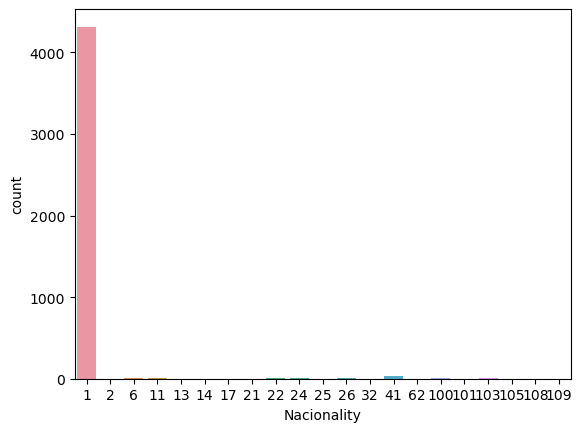

In [15]:
sns.countplot(x='Nacionality',data=data)

In [18]:
data['Daytime/evening attendance\t'].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='Daytime/evening attendance\t', ylabel='count'>

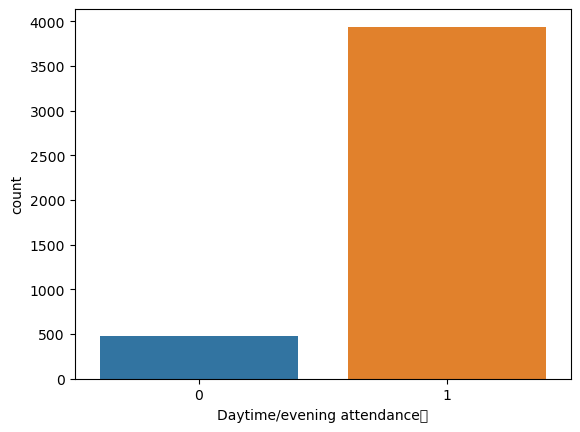

In [19]:
sns.countplot(x='Daytime/evening attendance\t',data=data)

In [20]:
data['Previous qualification'].unique()

array([ 1, 19, 42, 39, 10,  3, 40,  2,  4, 12, 43, 15,  6,  9, 38,  5, 14],
      dtype=int64)

<Axes: xlabel='Previous qualification', ylabel='count'>

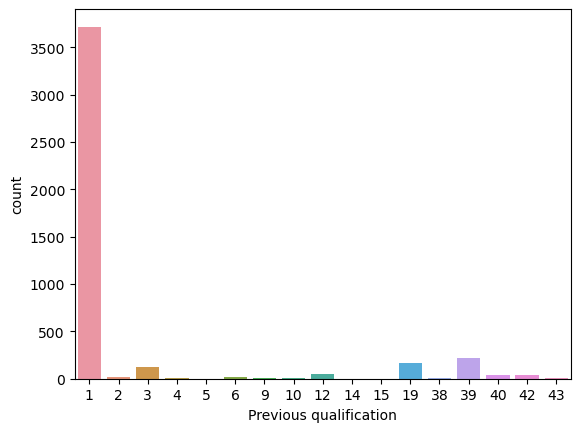

In [21]:
sns.countplot(x='Previous qualification',data=data)

In [23]:
data['Educational special needs'].unique()

array([0, 1], dtype=int64)

In [26]:
data['Educational special needs'].value_counts()

Educational special needs
0    4373
1      51
Name: count, dtype: int64

<Axes: xlabel='Educational special needs', ylabel='count'>

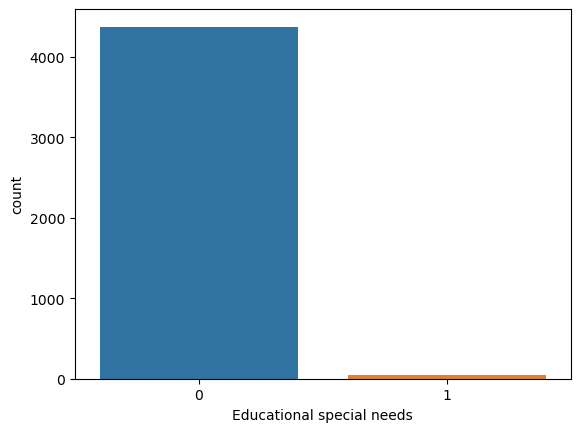

In [24]:
sns.countplot(x='Educational special needs',data=data)

In [30]:
data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

<Axes: xlabel='Target', ylabel='count'>

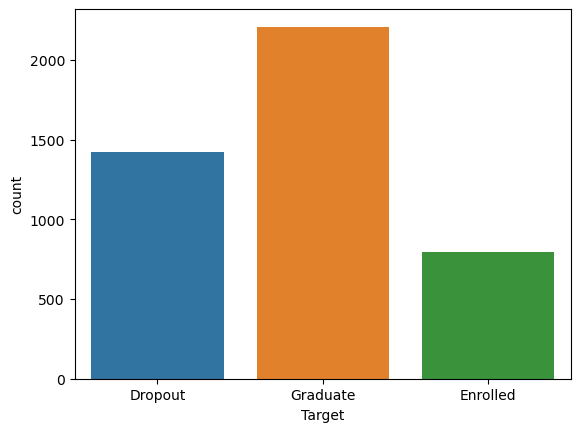

In [31]:
sns.countplot(x='Target',data=data)

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


# Check Outlires

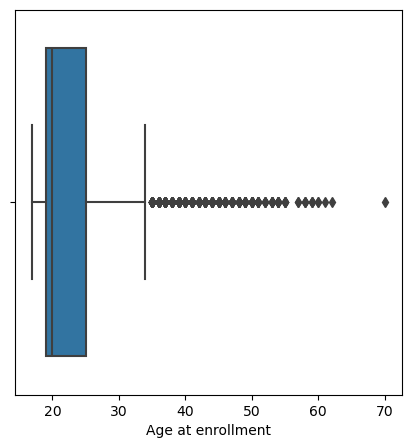

In [34]:
plt.figure(figsize=(5,5))
sns.boxplot(x=data['Age at enrollment'])
plt.show()

In [35]:
def remove_outlires(data,cols):
    for col in cols:
        Q1=data[col].quantile(0.25)
        Q3=data[col].quantile(0.75)
        IQR= Q3-Q1
        lower_bound=Q1-(1.5*IQR)
        upper_bound=Q3+(1.5*IQR)
        data=data[(data[col]>=lower_bound) & (data[col]<=upper_bound)]
    return data
cols=['Age at enrollment']
data=remove_outlires(data,cols)

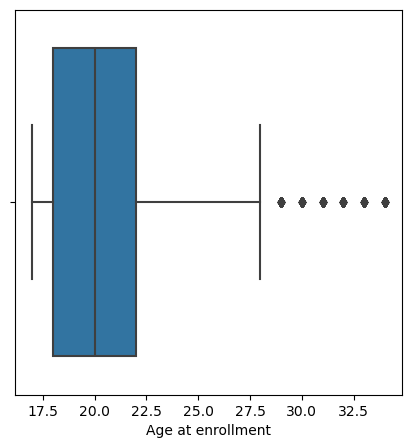

In [36]:
plt.figure(figsize=(5,5))
sns.boxplot(x=data['Age at enrollment'])
plt.show()

In [37]:
data.shape

(3983, 37)

# Encoding

In [3]:
data.Target.unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [4]:
data['Target'] = [0 if target == 'Dropout' else 1 if target == 'Graduate' else 2 for target in data['Target'] ] 

In [5]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


# Correlation

In [41]:
data.corr()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.000000,0.184032,-0.086059,0.045302,-0.163771,0.041006,0.030286,0.011217,0.109016,0.069936,0.025330,0.020009,0.011596,-0.168909,-0.017301,0.042924,-0.083054,-0.018370,-0.050911,0.382581,-0.010269,0.041748,0.042990,0.061031,-0.035008,-0.043160,0.013718,0.048110,0.038834,0.028535,-0.038142,-0.058724,0.009060,-0.026289,0.012688,-0.012601,-0.050027
Application mode,0.184032,1.000000,-0.257073,0.063427,-0.250132,0.458693,-0.006446,0.003558,0.037854,0.023107,0.047759,0.034177,-0.003837,-0.245691,-0.023980,0.123928,-0.123566,0.146625,-0.145016,0.536409,0.011531,0.264946,0.166329,0.237052,-0.028230,-0.102333,0.045467,0.251230,0.133015,0.184993,-0.064045,-0.099699,0.045684,0.095303,-0.026319,-0.006456,-0.090665
Application order,-0.086059,-0.257073,1.000000,0.066422,0.136814,-0.182992,-0.083062,-0.025494,-0.026466,-0.025420,-0.038742,-0.031280,-0.105233,0.315045,0.021720,-0.068375,0.042108,-0.081336,0.059573,-0.278653,-0.032049,-0.127820,0.001582,-0.088396,0.042407,0.051084,-0.031287,-0.119861,0.044415,-0.055133,0.072946,0.048231,-0.012444,-0.095813,-0.007407,0.026188,0.008012
Course,0.045302,0.063427,0.066422,1.000000,-0.048236,0.005261,-0.092760,-0.031828,0.055633,0.051601,0.031459,0.029103,-0.146523,-0.087738,-0.019046,-0.028832,0.027331,-0.109384,0.021682,0.041693,-0.023846,-0.118799,0.366245,0.298603,0.204710,0.426008,0.035802,-0.110726,0.432055,0.296040,0.217349,0.380600,0.031151,0.003039,0.017432,-0.013916,0.027774
Daytime/evening attendance\t,-0.163771,-0.250132,0.136814,-0.048236,1.000000,-0.071217,0.016763,0.007948,-0.135017,-0.092578,-0.007140,-0.001510,0.003078,0.214679,0.022917,-0.008147,0.027575,0.000003,0.086653,-0.431398,0.014844,-0.125421,-0.036739,-0.051112,0.026238,0.042652,0.043208,-0.103763,0.002179,-0.002805,0.039277,0.045748,0.002328,0.047313,-0.010654,0.014369,0.058865
Previous qualification,0.041006,0.458693,-0.182992,0.005261,-0.071217,1.000000,0.109019,-0.025164,-0.038050,-0.022338,0.018471,0.018975,0.205830,-0.105431,-0.011096,0.091070,-0.072089,0.076636,-0.062023,0.172420,-0.019800,0.187244,0.080795,0.137322,0.027951,0.005855,0.002672,0.162945,0.057835,0.124103,-0.001849,0.009360,-0.001499,0.120402,-0.061352,0.061493,-0.013177
Previous qualification (grade),0.030286,-0.006446,-0.083062,-0.092760,0.016763,0.109019,1.000000,0.057650,-0.031616,-0.014931,-0.011252,-0.022845,0.650251,-0.035348,-0.005289,-0.039096,0.051303,-0.038047,0.047845,-0.065502,0.051773,-0.011686,-0.037362,-0.077838,0.039028,0.041630,0.005528,-0.019322,-0.036926,-0.069644,0.044480,0.039371,-0.017448,0.048800,0.031844,-0.075767,0.007722
Nacionality,0.011217,0.003558,-0.025494,-0.031828,0.007948,-0.025164,0.057650,1.000000,-0.044307,-0.083654,0.045395,0.025019,0.041050,-0.009170,-0.006519,0.056208,-0.033148,-0.020073,-0.010650,0.018353,0.795756,0.006107,-0.014546,-0.002652,0.003057,0.004081,0.012998,-0.004088,-0.025435,-0.021049,-0.016276,-0.003850,-0.012639,-0.001867,-0.013582,0.034664,0.001640
Mother's qualification,0.109016,0.037854,-0.026466,0.055633,-0.135017,-0.038050,-0.031616,-0.044307,1.000000,0.509983,0.083015,0.057078,-0.041676,-0.013974,-0.016034,0.0135

<Axes: >

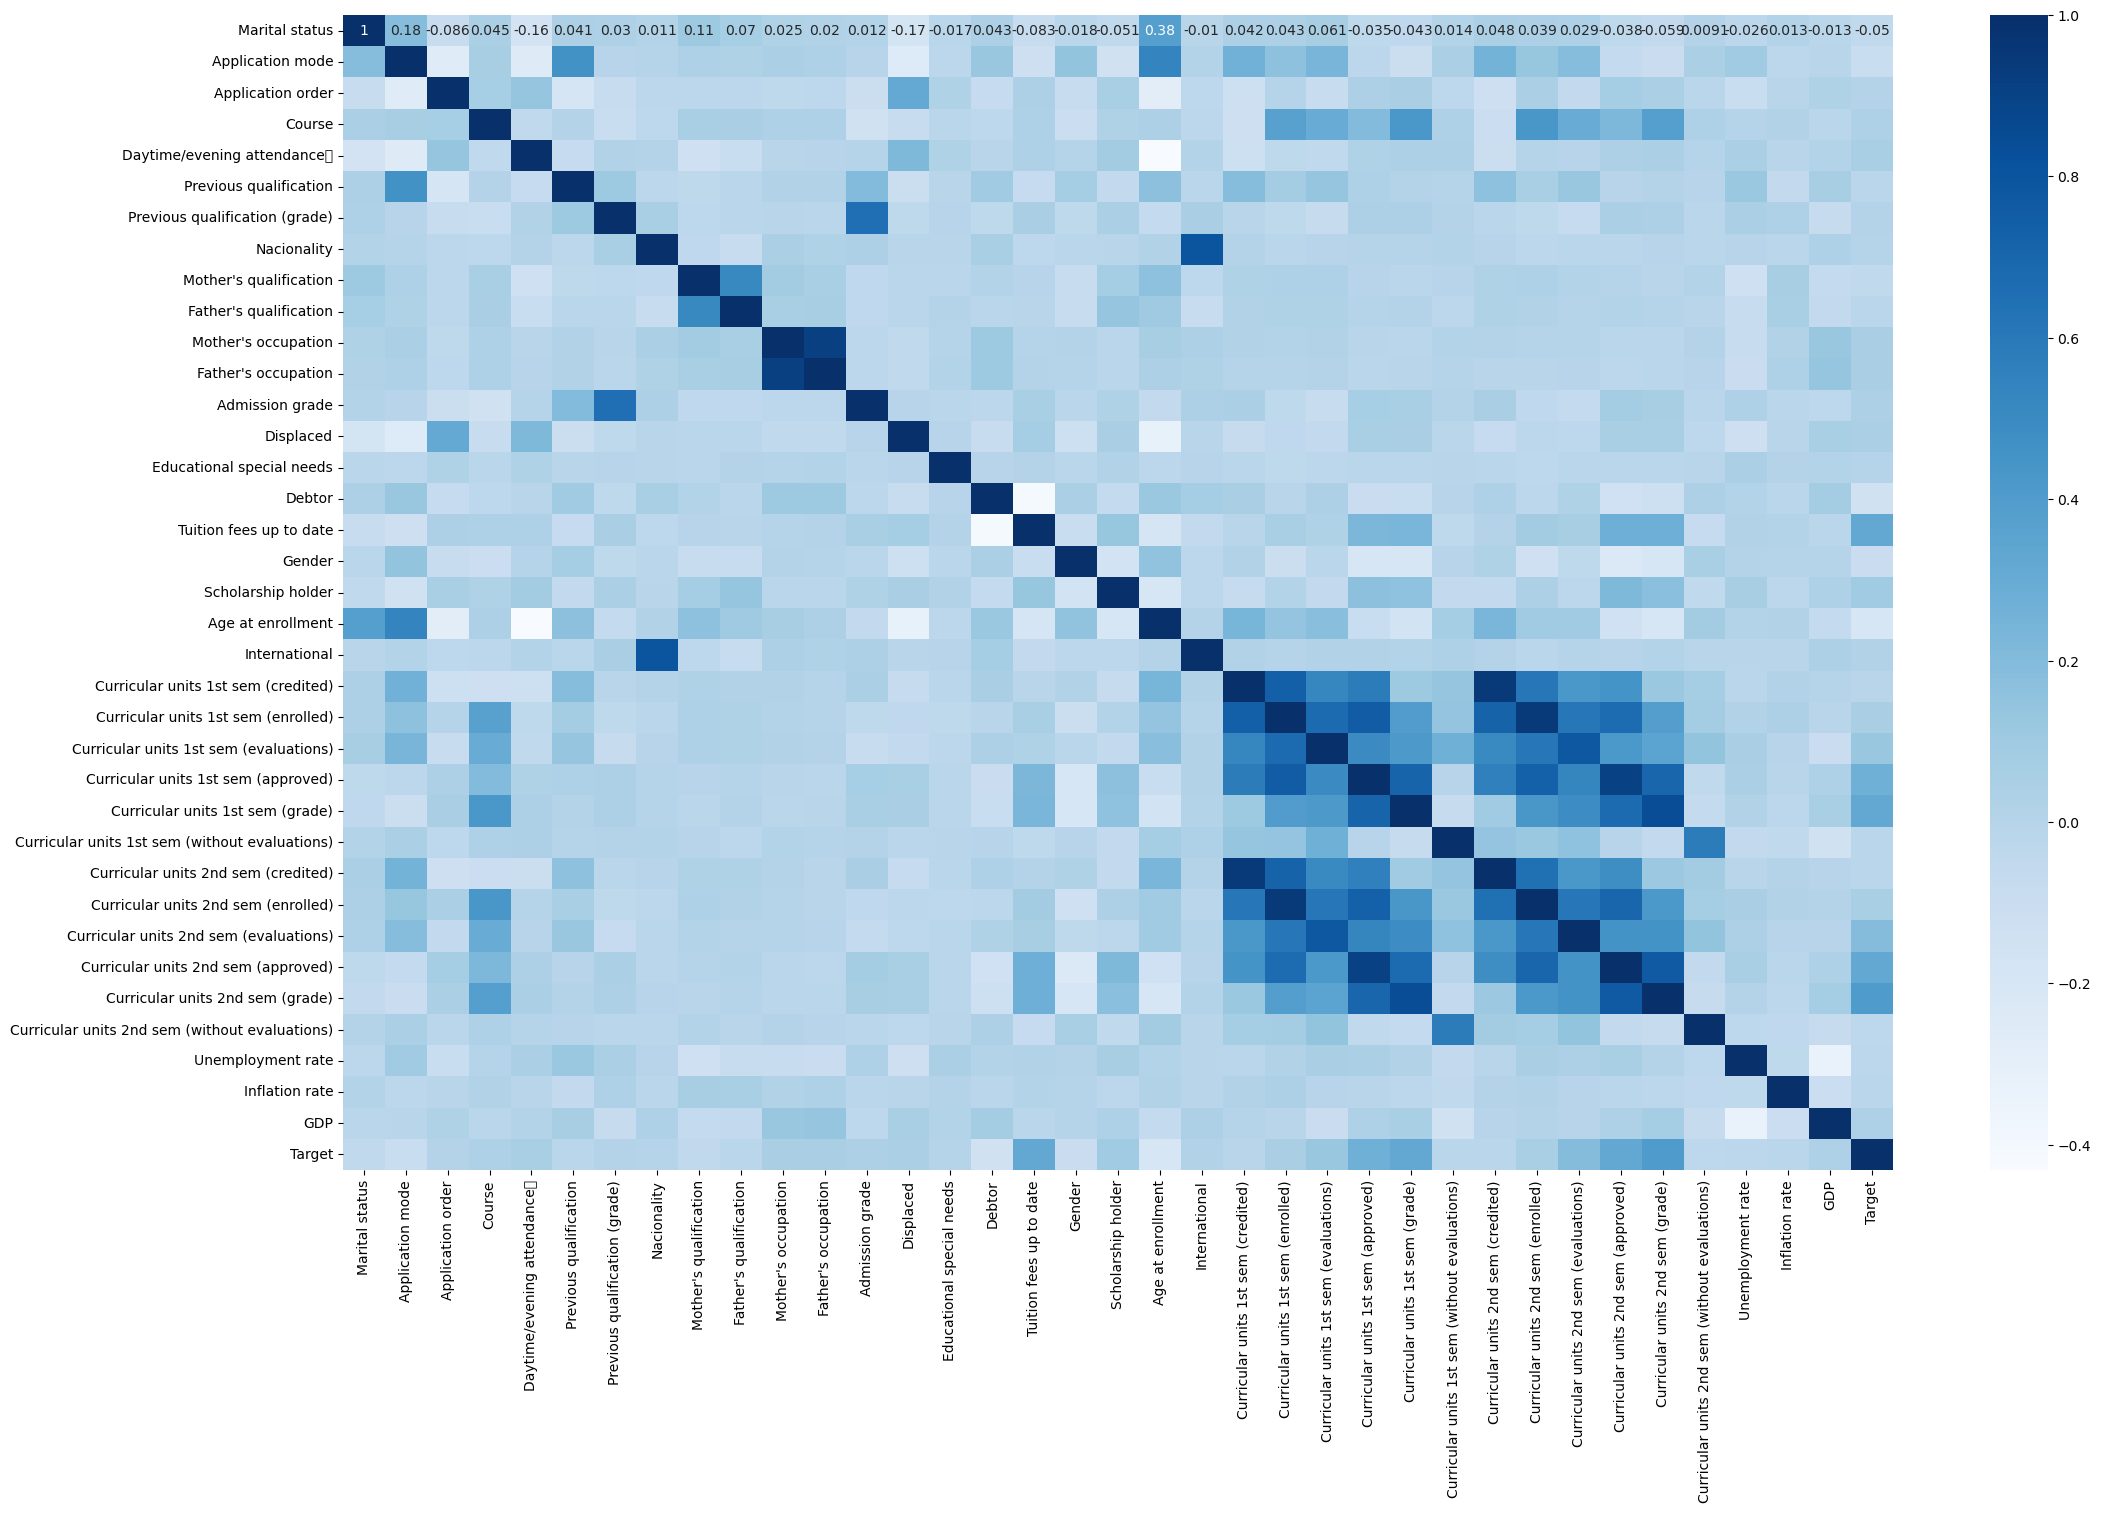

In [46]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(),annot=True , cmap='Blues')

# Split Data 

In [6]:
X=data.drop('Target',axis=1)
y=data['Target']

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=33,shuffle=True)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3539, 36), (885, 36), (3539,), (885,))

# Scaling

In [8]:
scal = StandardScaler()
x_train_scal = scal.fit_transform(x_train)
x_test_scal = scal.transform(x_test)

# Build Model

In [9]:
modelName = ['Logistic Regression','Decision Tree' , 'Random Forest' , 'KNN','SVC']
model = [LogisticRegression(solver='saga',C=0.1,max_iter=100,multi_class='multinomial',tol=0.001),DecisionTreeClassifier(), RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=44,max_features= 'auto') , KNeighborsClassifier(n_neighbors=4) , SVC(C=0.1,kernel='linear',gamma=0.1)]

In [10]:
def train_Model(modelName,model,x_train,x_test,y_train,y_test):
    result={}
    for name , model in zip(modelName,model):
        model.fit(x_train,y_train)
        train_score=model.score(x_train,y_train)
        y_pred = model.predict(x_test)
        ac=accuracy_score(y_pred,y_test)
        precision=precision_score(y_pred,y_test,average="micro")
        recall=recall_score(y_pred,y_test,average='micro')
        f1score=f1_score(y_pred,y_test,average='micro')
        result[name]= [train_score,ac,precision,recall,f1score]
    return result

In [18]:
modelName = ['Logistic Regression','Decision Tree' , 'Random Forest' , 'KNN','SVC']
model = [LogisticRegression(),DecisionTreeClassifier(), RandomForestClassifier() , KNeighborsClassifier(n_neighbors=4) , SVC(C=0.3)]

In [37]:
result = train_Model(modelName,model,x_train_scal,x_test_scal,y_train,y_test)
result = pd.DataFrame(result,index=['train_score','Accuracy','precision','recall','f1score'])
result

,Logistic Regression,Decision Tree,Random Forest,KNN,SVC
train_score,0.776208,1.000000,1.000000,0.806725,0.782990
Accuracy,0.764972,0.672316,0.776271,0.690395,0.746893
precision,0.764972,0.672316,0.776271,0.690395,0.746893
recall,0.764972,0.672316,0.776271,0.690395,0.746893
f1score,0.764972,0.672316,0.776271,0.690395,0.746893


## train without scale

In [19]:
result = train_Model(modelName,model,x_train,x_test,y_train,y_test)
result = pd.DataFrame(result,index=['train_score','Accuracy','precision','recall','f1score'])
result

,Logistic Regression,Decision Tree,Random Forest,KNN,SVC
train_score,0.688047,1.000000,1.000000,0.747386,0.496185
Accuracy,0.689266,0.665537,0.769492,0.607910,0.511864
precision,0.689266,0.665537,0.769492,0.607910,0.511864
recall,0.689266,0.665537,0.769492,0.607910,0.511864
f1score,0.689266,0.665537,0.769492,0.607910,0.511864


# Build Bagging

In [38]:
from sklearn.ensemble import BaggingClassifier
svmodel= SVC(random_state=42)
dtmodel= DecisionTreeClassifier(random_state=42)
lrmodel= LogisticRegression()
knmodel= KNeighborsClassifier(n_neighbors=5)

bagg_SV = BaggingClassifier( base_estimator=svmodel ,bootstrap=True,n_estimators=5)
bagg_DS = BaggingClassifier( base_estimator=dtmodel ,bootstrap=True,n_estimators=5)
bagg_KN = BaggingClassifier( base_estimator=knmodel ,bootstrap=True,n_estimators=5,random_state=42)
bagg_LR = BaggingClassifier( base_estimator=lrmodel ,bootstrap=True,n_estimators=5)

In [39]:
BaggModelName = ['Bagg Logistic Regression','Bagg Decision Tree' , 'Bagg KNN','Bagg SVC']
BaggModel = [bagg_LR,bagg_DS, bagg_KN, bagg_SV]


In [40]:
result = train_Model(BaggModelName,BaggModel,x_train_scal,x_test_scal,y_train,y_test)
result = pd.DataFrame(result,index=['train_score','Accuracy','precision','recall','f1score'])
result

,Bagg Logistic Regression,Bagg Decision Tree,Bagg KNN,Bagg SVC
train_score,0.772535,0.964114,0.801074,0.825657
Accuracy,0.768362,0.700565,0.697175,0.757062
precision,0.768362,0.700565,0.697175,0.757062
recall,0.768362,0.700565,0.697175,0.757062
f1score,0.768362,0.700565,0.697175,0.757062


# Select best columns

In [16]:
scalMinMax = MinMaxScaler()
x_train_scalMin = scalMinMax.fit_transform(x_train)
x_test_scalMin = scalMinMax.transform(x_test)

In [34]:
from sklearn.feature_selection import SelectFromModel
fsm=SelectFromModel(RandomForestClassifier())
fsm.fit(x_train_scal,y_train)

x_train_selected=fsm.transform(x_train_scal)
x_test_selected=fsm.transform(x_test_scal)
mask = fsm.get_support()
selected_feature_names = pd.DataFrame(x_train_scal).columns[mask]
selected_feature_names

Index([3, 6, 11, 12, 16, 19, 23, 24, 25, 29, 30, 31], dtype='int64')

In [35]:
result = train_Model(modelName,model,x_train_selected,x_test_selected,y_train,y_test)
result = pd.DataFrame(result,index=['train_score','Accuracy','precision','recall','f1score'])
result

,Logistic Regression,Decision Tree,Random Forest,KNN,SVC
train_score,0.745126,1.000000,1.000000,0.812376,0.758406
Accuracy,0.758192,0.655367,0.751412,0.707345,0.754802
precision,0.758192,0.655367,0.751412,0.707345,0.754802
recall,0.758192,0.655367,0.751412,0.707345,0.754802
f1score,0.758192,0.655367,0.751412,0.707345,0.754802
